In [17]:
%matplotlib inline
import spectral_cube
import yt
import numpy as np
from yt.mods import ColorTransferFunction, write_bitmap
import astropy.units as u
from aplpy.image_util import percentile_function

In [2]:
cube = spectral_cube.io.core.read('DATACUBE-HDFS-v1.24.fits', format='fits', hdu=1)
ytcube = cube.to_yt()
ds = ytcube.dataset

/home/simon/lib/virtualenvs/viz/lib/python2.7/site-packages/spectral_cube/cube_utils.py:101: UserWarning: No spectral axis found; header may be non-compliant.
  warnings.warn("No spectral axis found; header may be non-compliant.")
/home/simon/lib/virtualenvs/viz/lib/python2.7/site-packages/spectral_cube/spectral_cube.py:243: UserWarning: Could not parse unit 10**(-20)*erg/s/cm**2/Angstrom
  warnings.warn("Could not parse unit {0}".format(self._meta['BUNIT']))
yt : [WARNING  ] 2015-04-03 17:58:04,020 Cannot find time
yt : [INFO     ] 2015-04-03 17:58:04,099 Found length units of Angstrom.
yt : [INFO     ] 2015-04-03 17:58:04,118 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-04-03 17:58:04,119 Parameters: domain_dimensions         = [ 326  331 3641]
yt : [INFO     ] 2015-04-03 17:58:04,119 Parameters: domain_left_edge          = [ 0.5  0.5  0.5]
yt : [INFO     ] 2015-04-03 17:58:04,120 Parameters: domain_right_edge         = [  326.5   331.5  3641.5]
yt : [INFO     ] 

In [3]:
ds.print_stats()

yt : [INFO     ] 2015-04-03 17:58:04,934 Adding field flux to the list of fields.
yt : [INFO     ] 2015-04-03 17:58:04,947 Loading field plugins.
yt : [INFO     ] 2015-04-03 17:58:04,948 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,948 Loaded astro (15 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,948 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,949 Loaded fluid (64 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,950 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,950 Loaded geometric (112 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,951 Loaded local (112 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,951 Loaded magnetic_field (120 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,951 Loaded my_plugins (120 new fields)
yt : [INFO     ] 2015-04-03 17:58:04,952 Loaded species (122 new fields)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	   512	     392885746	           733
----------------------------------------------
   	   512	     392885746


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 3.241e-33 Mpc
	Width: 3.241e-27 pc
	Width: 6.685e-22 AU
	Width: 1.000e-08 cm


In [23]:
auto_v = percentile_function(cube._data)
mi, ma = auto_v(0.15), auto_v(99.95)

In [29]:
tf = ColorTransferFunction((mi, ma))
tf.add_layers(4, w=0.3)
c = [0.5, 0.5, 0.5]
L = [0.5, 0.2, 0.9]
W = 1.0
Nvec = 512
cam = ds.camera(c, L, W, Nvec, tf)
image = cam.snapshot("test-yt.png", 8.0)

YTFieldNotFound: Could not find field '('all', 'density')' in InMemoryFITSImage_eaaf42f4887b4847a99606f7b2f5328e.

yt : [INFO     ] 2015-04-03 18:09:48,867 xlim = 0.500000 326.500000
yt : [INFO     ] 2015-04-03 18:09:48,868 ylim = 0.500000 331.500000
yt : [INFO     ] 2015-04-03 18:09:48,868 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800
yt : [INFO     ] 2015-04-03 18:09:48,908 xlim = 0.500000 326.500000
yt : [INFO     ] 2015-04-03 18:09:48,908 ylim = 0.500000 331.500000
yt : [INFO     ] 2015-04-03 18:09:48,909 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800
yt : [INFO     ] 2015-04-03 18:09:48,920 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800



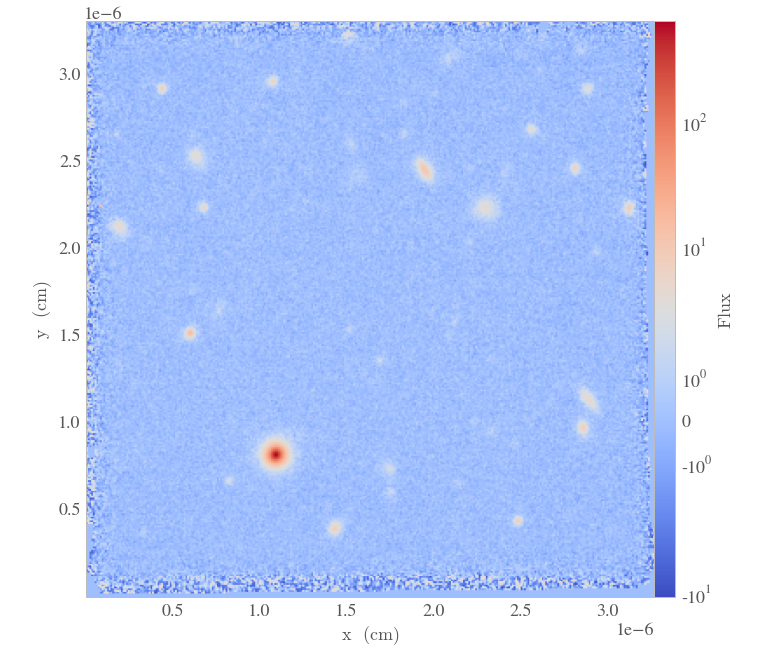

In [16]:
slc = yt.SlicePlot(ds, "z", ["flux"], origin="native")
slc.set_cmap(field='all', cmap='coolwarm')
slc.set_log('flux', True, linthresh=2)
#slc.set_axes_unit('Mpc')
slc.show()

yt : [INFO     ] 2015-04-03 17:47:46,421 xlim = 0.500000 3641.500000
yt : [INFO     ] 2015-04-03 17:47:46,421 ylim = 0.500000 326.500000
yt : [INFO     ] 2015-04-03 17:47:46,422 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800
yt : [INFO     ] 2015-04-03 17:47:46,690 xlim = 0.500000 3641.500000
yt : [INFO     ] 2015-04-03 17:47:46,690 ylim = 0.500000 326.500000
yt : [INFO     ] 2015-04-03 17:47:46,691 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800
yt : [INFO     ] 2015-04-03 17:47:46,751 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800



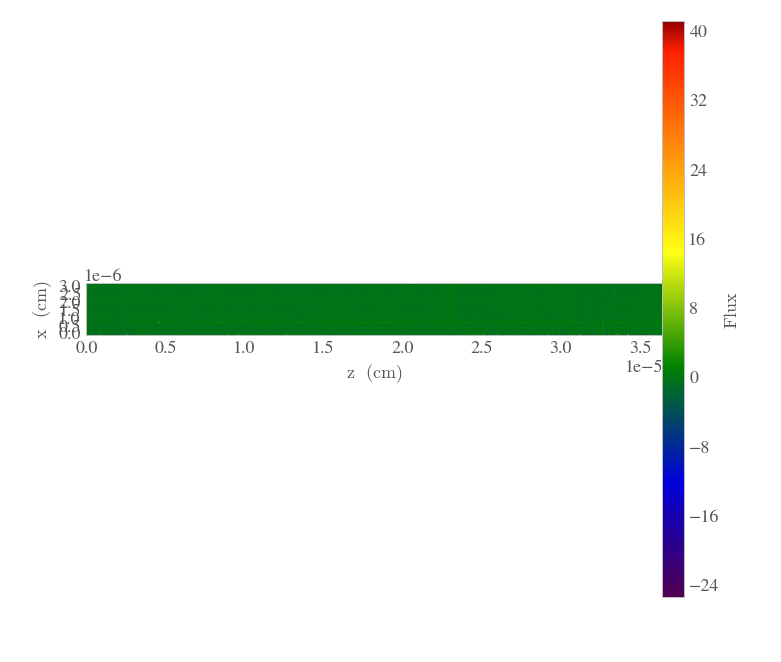

In [11]:
slc = yt.SlicePlot(ds, "y", ["flux"], origin="native", window_size=(8,8))
slc.show()

In [5]:
from yt.frontends.fits.misc import PlotWindowWCS
PlotWindowWCS(slc)

NotImplementedError: WCS axes are not implemented for this dataset.

yt : [INFO     ] 2015-04-03 17:44:06,177 Projection completed
yt : [INFO     ] 2015-04-03 17:44:06,183 xlim = 0.500000 326.500000
yt : [INFO     ] 2015-04-03 17:44:06,184 ylim = 0.500000 331.500000
yt : [INFO     ] 2015-04-03 17:44:06,184 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800
yt : [INFO     ] 2015-04-03 17:44:06,196 xlim = 0.500000 326.500000
yt : [INFO     ] 2015-04-03 17:44:06,196 ylim = 0.500000 331.500000
yt : [INFO     ] 2015-04-03 17:44:06,197 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800
yt : [INFO     ] 2015-04-03 17:44:06,208 Making a fixed resolution buffer of (('fits', 'flux')) 800 by 800



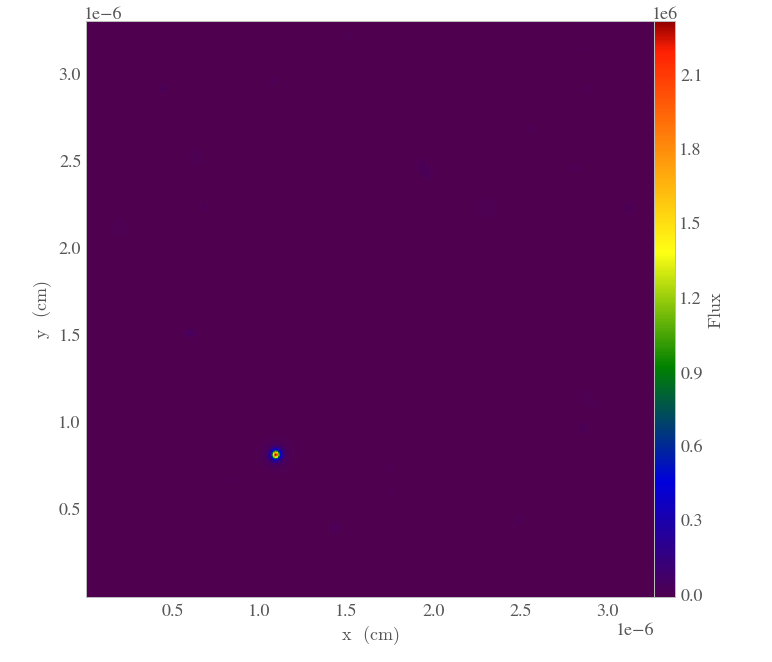

In [7]:
prj = yt.ProjectionPlot(ds, "z", ["flux"], proj_style="sum", origin="native")
prj.show()